Problem Statement



In the ever-changing real estate market, accurately predicting house prices is vital. This project aims to create a model that estimates house prices based on factors like location, size, and bedrooms. We'll analyze the given data to uncover patterns and relationships between features, visualize house price trends, and pinpoint important predictors. The dataset contains X rows and Y columns. Tasks include preparing the data, exploring trends, building the model, and assessing its accuracy. Deliverables include a detailed analysis report, a predictive model, performance metrics, and actionable insights

In [52]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load Dataset
data = pd.read_csv('Housing.csv')

In [54]:
# Dataset rows and columns count
rows = data.shape[0]
cols = data.shape[1]
print("Rows: ", rows)
print("Columns: ", cols)

Rows:  545
Columns:  13


In [55]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [56]:
# Dataset Duplicate value count
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [57]:
# Missing duplicate Value count
missing_values_count = data.isnull().sum().reset_index()
print("Missing Values/Null Values Count:\n")
print(missing_values_count)

Missing Values/Null Values Count:

               index  0
0              price  0
1               area  0
2           bedrooms  0
3          bathrooms  0
4            stories  0
5           mainroad  0
6          guestroom  0
7           basement  0
8    hotwaterheating  0
9    airconditioning  0
10           parking  0
11          prefarea  0
12  furnishingstatus  0


<Axes: >

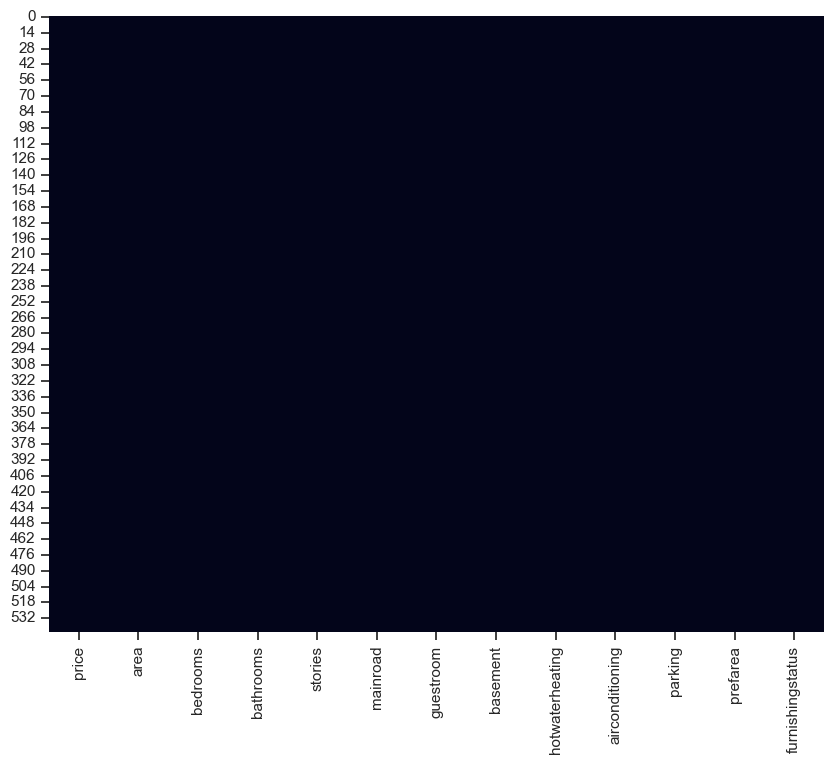

In [58]:
# Visualizing the missing values
plt.figure(figsize = (10,8))
sns.heatmap(data.isnull(), cbar=False)

## Understanding your variables

In [59]:
#Dataset Columns
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [60]:
#Dataset Describe
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [61]:
#Check unique values for each variable
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for price: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  493500

## Data Wrangling

In [62]:
#Group by mainland and furnishingstatus and find the count for each combination
by_road_furnishing_count = data.groupby(['mainroad', 'furnishingstatus']).size().to_frame(name='count')
print(by_road_furnishing_count)

                           count
mainroad furnishingstatus       
no       furnished             9
         semi-furnished       31
         unfurnished          37
yes      furnished           131
         semi-furnished      196
         unfurnished         141


In [63]:
#Group by bedrooms and calculate the sum of the area for each group
by_bedrooms_area_sum = data.groupby('bedrooms')['area'].sum()
print(by_bedrooms_area_sum)

bedrooms
1       7420
2     630528
3    1567986
4     530296
5      62915
6       7900
Name: area, dtype: int64


In [64]:
#Find the mean price for the houses with the guestroom and without guestroom
mean_price_guestroom = data.groupby('guestroom')['price'].mean()
print(mean_price_guestroom)

guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64


In [65]:
#Get unique categories within a column
unique_categories = data['prefarea'].unique()
print(unique_categories)

['yes' 'no']


In [66]:
#filter data based on condition
filtered_data = data[data['bedrooms'] > 3]
filtered_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2870000,5400,4,1,2,yes,no,no,no,no,0,no,unfurnished
488,2852500,5200,4,1,3,yes,no,no,no,no,0,no,unfurnished
523,2380000,2787,4,2,2,yes,no,no,no,no,0,no,furnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


## Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

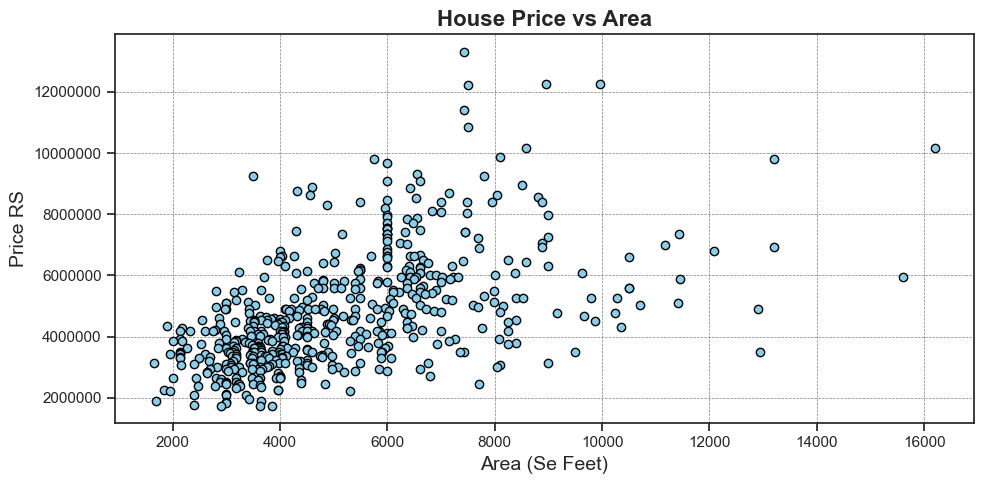

In [67]:
# chart -1 visualization code
# price vs area
plt.figure(figsize=(10, 5))
plt.scatter(data['area'], data['price'], color='skyblue', edgecolor='black')
plt.title('House Price vs Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (Se Feet)', fontsize=14)
plt.ylabel('Price RS', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', axis='both')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_21848\381719130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=data, palette='Set1')


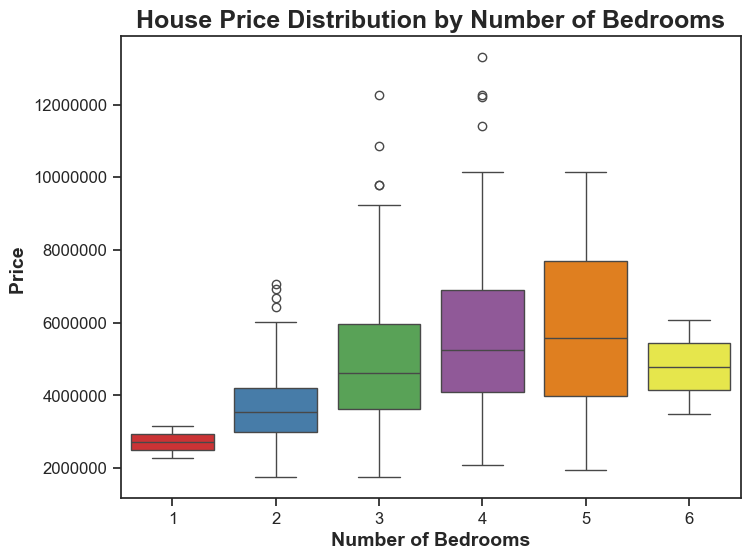

In [68]:
#chart -2 visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=data, palette='Set1')
plt.title('House Price Distribution by Number of Bedrooms', fontsize=18, fontweight='bold')
plt.xlabel('Number of Bedrooms', fontsize=14, fontweight='bold')
plt.ylabel('Price ', fontsize=14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

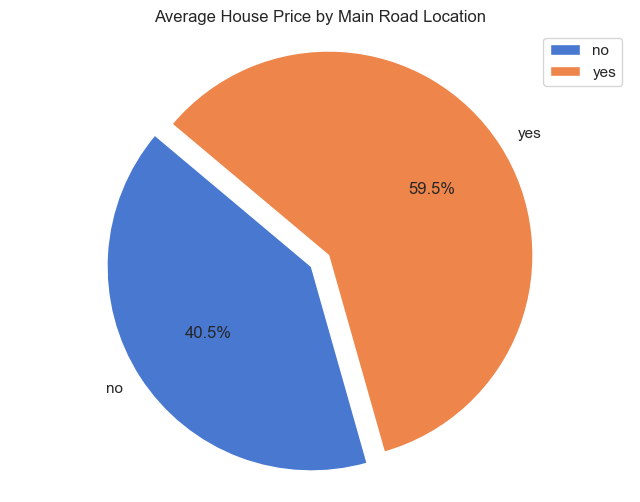

In [69]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt

# Assuming you already have the 'average_price_mainroad' DataFrame and 'data' DataFrame defined

average_price_mainroad = data.groupby('mainroad')['price'].mean()
plt.figure(figsize=(8, 6))
explode = (0.1, 0)
plt.pie(average_price_mainroad, labels=average_price_mainroad.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Average House Price by Main Road Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(average_price_mainroad.index, loc="best")

plt.show()

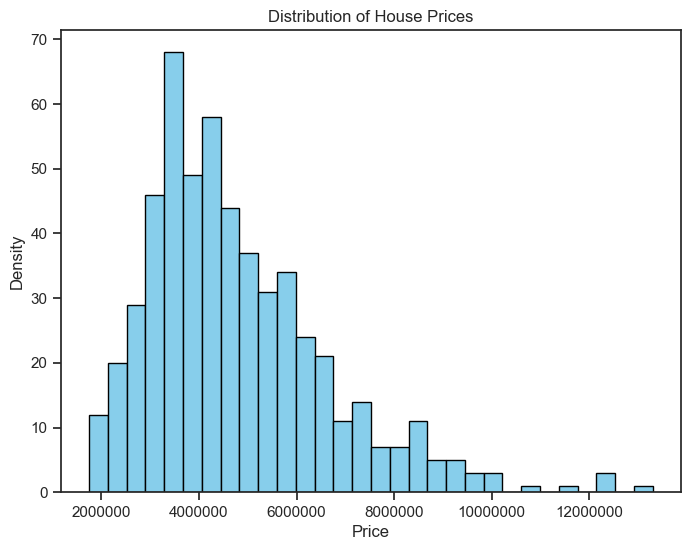

In [70]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')  # Set density to True for KDE
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')  # Change ylabel to reflect density
plt.ticklabel_format(style='plain', axis='x')
plt.show()

<Figure size 1200x800 with 0 Axes>

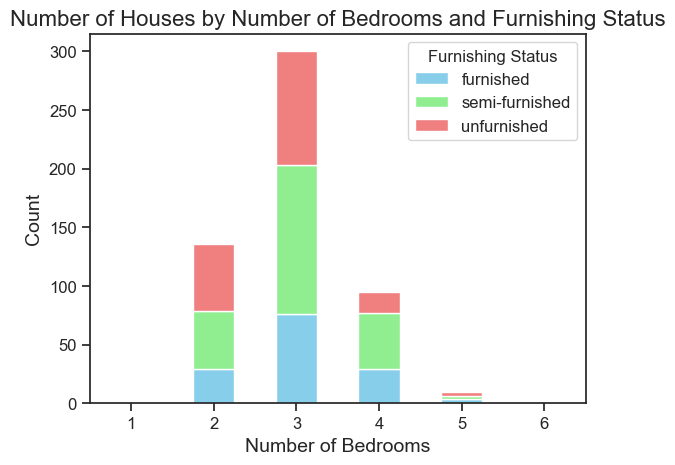

In [71]:
# Chart - 5 visualization code
grouped_counts = data.groupby(['bedrooms', 'furnishingstatus']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
grouped_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral'])

plt.title('Number of Houses by Number of Bedrooms and Furnishing Status', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Furnishing Status', fontsize=12, title_fontsize=12)
plt.show()

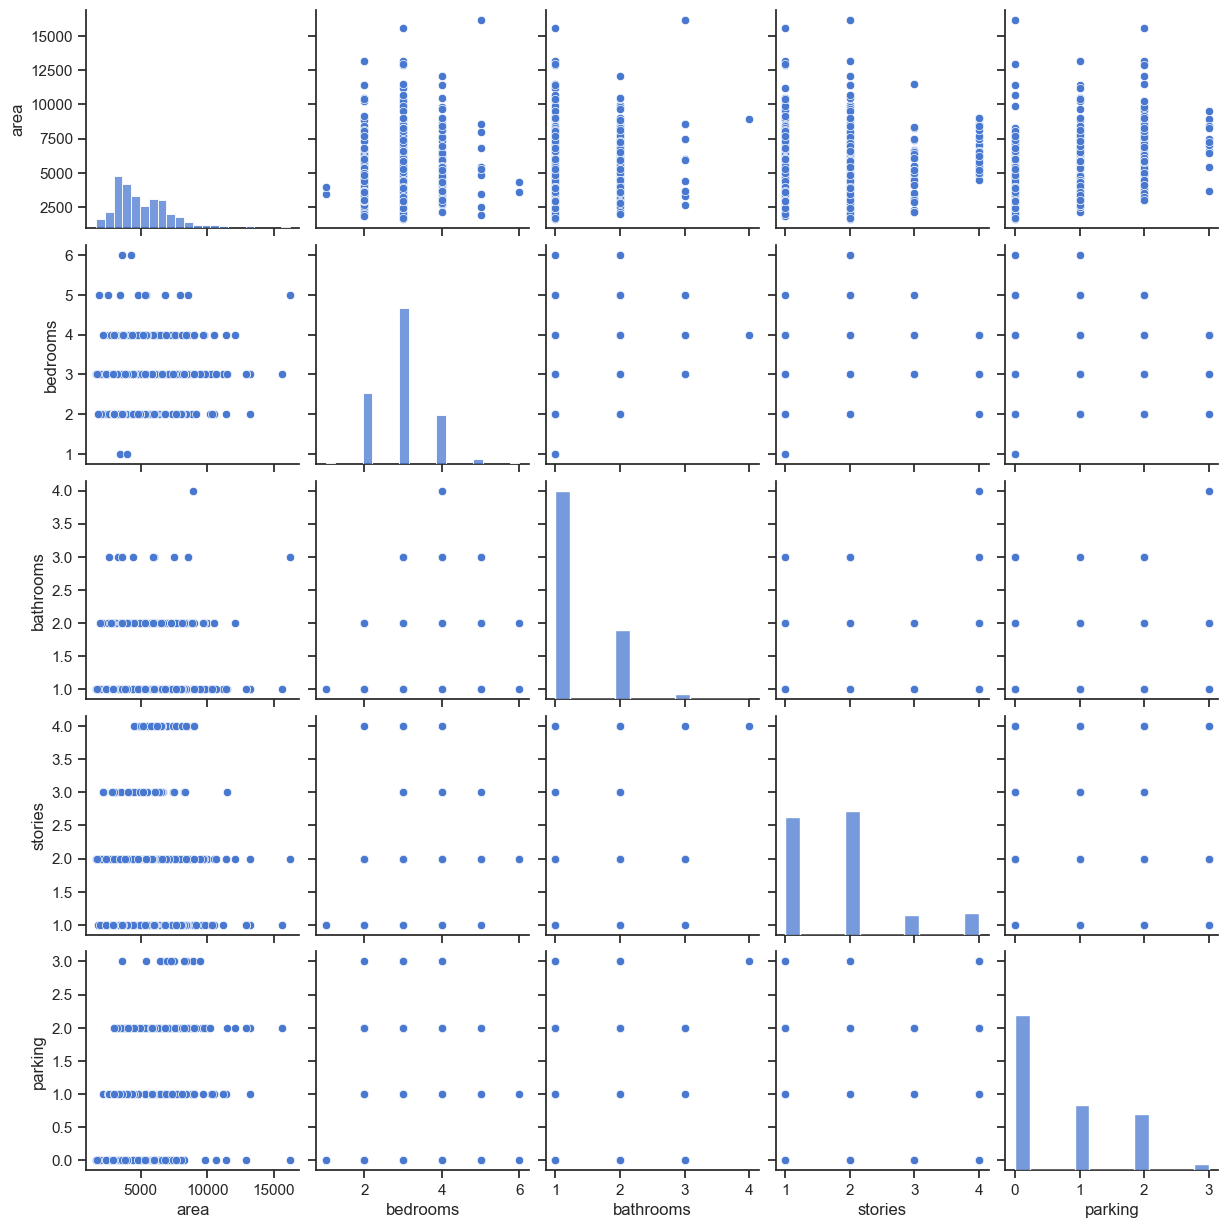

In [72]:
# Chart - 6 visualization code
sns.pairplot(data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.ticklabel_format(style='plain', axis='both')
plt.show()

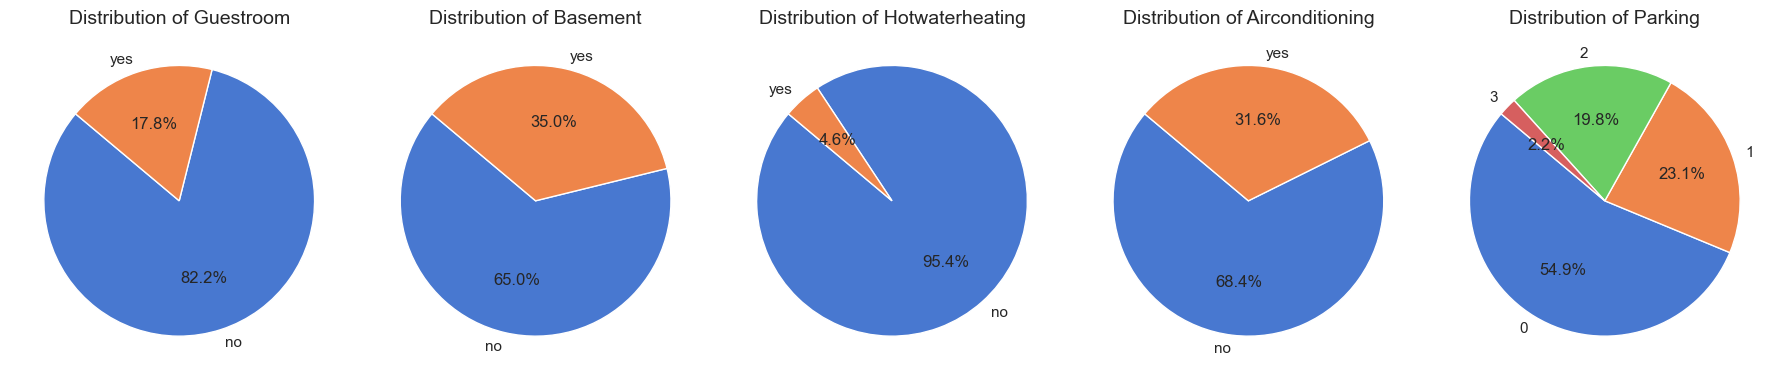

In [73]:
#Chart - 7 visualization code
columns_to_plot = ['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(18, 5))
for i, column in enumerate(columns_to_plot):
    counts = data[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {column.capitalize()}', fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_21848\764867196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='furnishingstatus', y='price', data=data, palette='Set2')


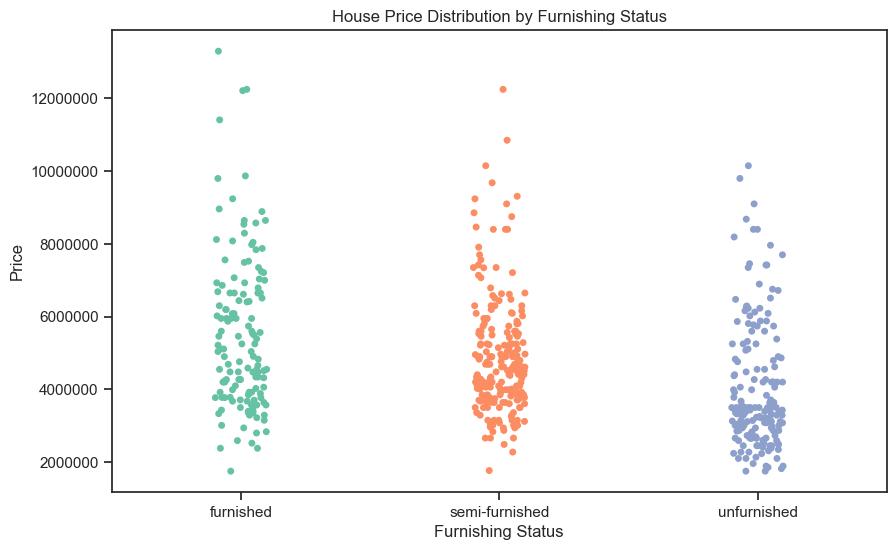

In [74]:
#Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.stripplot(x='furnishingstatus', y='price', data=data, palette='Set2')

# Adding title and labels
plt.title('House Price Distribution by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_21848\1761372776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prefarea', y='price', data=data, palette=palette)


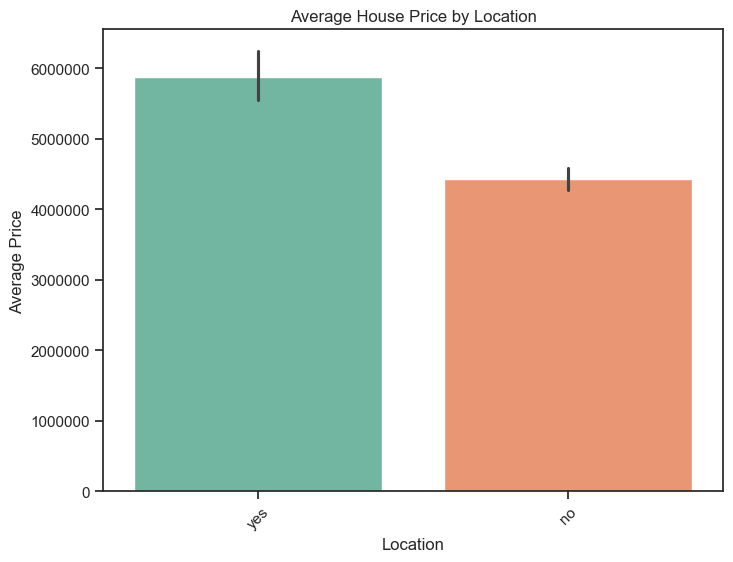

In [75]:
# Chart - 9 visualization code

# Bar Plots
# Average price by location
palette = 'Set2'
plt.figure(figsize=(8, 6))
sns.barplot(x='prefarea', y='price', data=data, palette=palette)
plt.title('Average House Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_21848\4158337977.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stories', y='price', data=data, palette='Set1')


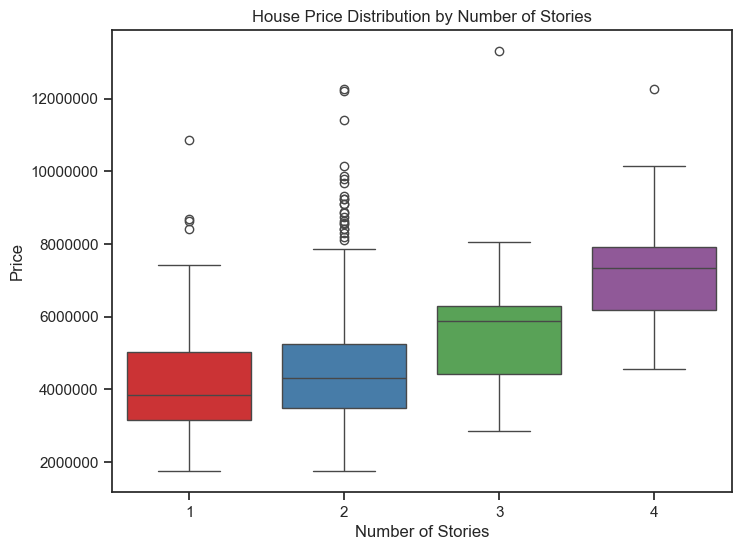

In [76]:
# Chart - 10 visualization code

palette = 'Pastel1'
plt.figure(figsize=(8, 6))
sns.boxplot(x='stories', y='price', data=data, palette='Set1')


plt.title('House Price Distribution by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

# Show the boxplot
plt.show()

<Figure size 800x600 with 0 Axes>

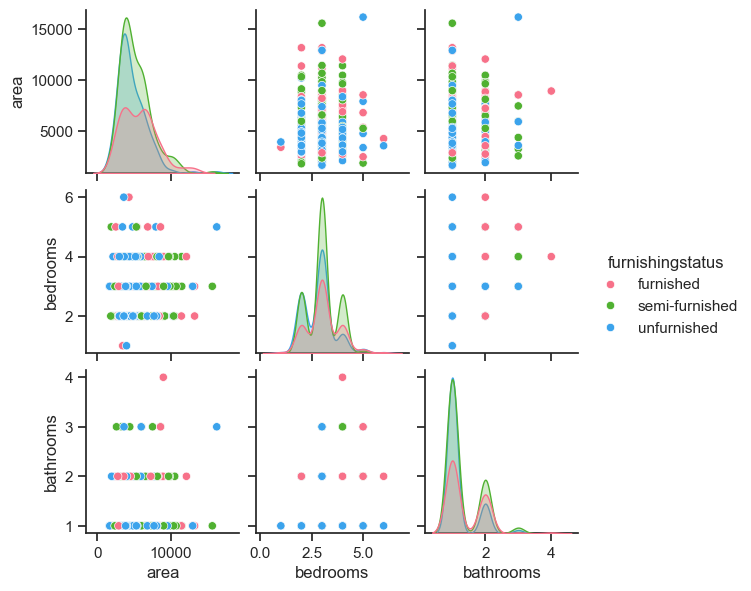

In [77]:
#pair plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
columns_for_pairplot = [ 'area', 'bedrooms', 'bathrooms', 'furnishingstatus']
sns.set(style="ticks", palette="muted")
sns.pairplot(data[columns_for_pairplot], hue='furnishingstatus', diag_kind="kde", markers="o", palette="husl", height=2)
plt.show()

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error

In [79]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [80]:
mapping = {"yes": 1, "no": 0}
data = data.apply(lambda col: col.map(mapping) if col.name in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] else col)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [81]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [82]:
y = data.price

features = ['area', 'bedrooms',  'stories', 'hotwaterheating', 'airconditioning', 'parking']
X = data[features]



In [83]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [84]:
house_model = DecisionTreeRegressor(random_state = 1)

In [85]:
house_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [86]:
decision_predictions = house_model.predict(val_X)

decision_mae = mean_absolute_error(decision_predictions, val_y)

decision_mae

1390223.8442822385

In [87]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = data


df['total rooms'] = df['bedrooms'] + df['bathrooms'] + df['stories']


columns_to_drop = ['bedrooms', 'bathrooms', 'stories']
df = df.drop(columns=columns_to_drop)


skewed_features = ['price', 'area']
df[skewed_features] = np.log1p(df[skewed_features])  

cleaned_data_filename = 'cleaned_house.csv'
df.to_csv(cleaned_data_filename, index=False)
print(f"Preprocessed and cleaned data saved as {cleaned_data_filename}")


X = df.drop('price', axis=1)
y = df['price']

random_state = 73
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


cat_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_columns)
    ],
    remainder='passthrough'
)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = r2_score(y_test, y_pred)


r2_percentage = r2 * 100

print(f"R-squared Score: {r2_percentage:.2f}%")

Preprocessed and cleaned data saved as cleaned_house.csv
Mean Squared Error: 0.039979788568507806
R-squared Score: 75.57%
